# Multi-Label Classification for NLP

The problem we will be solving in this notebook is doing Multi-Label classification where each example can have **zero-to-many** different labels associated with it. This is a different kind of problem to just Multi-Label classification where each example just has **zero-to-one** labels with each example. 

**Layout**
- Loading and pre-processing the data
- Machine Learning for Multi-Label
    - Naive Bayes
    - Support Vector Machines (SVM)
    - Logistic Regression
- Using Ensemble Chains
- Random Search with Multiclass
- Looking at predictions

Link to data: https://www.kaggle.com/andy8744/isekai-light-novel-titles-and-descriptions

**About the data**

Isekai, is a Japanese genre of portal fantasy. It includes novels, light novels, films, manga, anime and video games that revolve around a person or people who are transported to and have to survive in another world, such as a fantasy world, virtual world, another planet, future/past time, or parallel universe. - Wikipedia

**About the dataset**

The data contains multiple genres for each description. So we will be making models to predict all of the genres based on the description. 

**Imports**

In [1]:
import warnings
import os
import opendatasets as od # Allows us to download the data directly from kaggle
import pandas as pd # For loading data
import nltk # NLTK stands for Natural Language Took Kit
from nltk.corpus import stopwords
import re # Regex
import string # String library has more string manipulation features
import numpy as np # Numerical Python library
import matplotlib.pyplot as plt # For graphing
import seaborn as sns # For graphing
from sklearn.feature_extraction.text import TfidfVectorizer # Tokenizes the data based on a term-frequency-inverse-document algorithm
from sklearn.feature_extraction.text import CountVectorizer # Implements tokenization and counts all in one
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dlili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
warnings.filterwarnings("ignore")

## Loading and pre-processing the data

#### Loading the data from Kaggle

{"username":"dereklilienthal","key":"450b44bdec11e8a25f2bdb704097a58f"}

In [4]:
#od.download('https://www.kaggle.com/andy8744/isekai-light-novel-titles-and-descriptions')

*Taking a look at the downloaded dataset in the directory*

In [5]:
data_dir = "./isekai-light-novel-titles-and-descriptions/"
os.listdir(data_dir)

['light-novel-titles.csv']

#### Loading the data into a pandas dataframe

In [6]:
df = pd.read_csv(data_dir+'light-novel-titles.csv')
df = df.convert_dtypes() # Converting the datatypes from object to something else
df

,titles,descriptions,genres,links
0,Thereafter of an Exiled Magician ~Somehow My E...,"Lain, a reincarnated person, lives his life as...","['Action', 'Adventure', 'Ecchi', 'Fantasy', 'H...",https://www.novelupdates.com/series/thereafter...
1,Mahoutsukai no Konyakusha (LN),I who was reincarnated into a world of sword a...,"['Action', 'Drama', 'Fantasy', 'Harem', 'Matur...",https://www.novelupdates.com/series/mahoutsuka...
2,Exiled Prince Without Skills: Infinite Growth ...,"Henry, born in a royal family without skills, ...","['Action', 'Adventure', 'Fantasy', 'Horror', '...",https://www.novelupdates.com/series/exiled-pri...
3,Reincarnation Of The Strongest Sword God,"Starting over once more, he has entered this “...","['Action', 'Fantasy', 'Martial Arts', 'School ...",https://www.novelupdates.com/series/reincarnat...
4,Hard Work Will Never Betray Me (LN),A youth whose effort wasn’t rewarded lost his ...,"['Action', 'Adventure', 'Fantasy']",https://www.novelupdates.com/series/hard-work-...
...,...,...,...,...
1361,Slayers,"""Slayers follows the adventures of teenage sor...","['Action', 'Fantasy', 'Shounen', 'Supernatural']",https://www.novelupdates.com/series/slayers/
1362,No. 6,"The year is 2013, and it's the city of No. 6: ...","['Action', 'Adventure', 'Fantasy', 'School Life']",https://www.novelupdates.com/series/no-6/
1363,Kidou Senshi Gundam High-Streamer,Originally published in Animage magazine in th...,"['Comedy', 'Shounen Ai']",https://www.novelupdates.com/series/kidou-sens...
1364,Oda Nobuna no Yabou,"Suddenly finding himself in the Sengoku era, r...","['Action', 'Adventure', 'Comedy', 'Fantasy', '...",https://www.novelupdates.com/series/oda-nobuna...


**Looking at some of the examples**

In [7]:
random_example = np.random.choice(df.shape[0])
print(f"##### Example {random_example} #####", 
      df['descriptions'].iloc[random_example], '',
      "##### Genres #####", 
      df['genres'].iloc[random_example], sep="\n")

##### Example 28 #####
If I were to fall into a game, I wish I would fall when I was young.


##### Genres #####
['Action', 'Fantasy', 'Martial Arts', 'School Life', 'Sci-fi', 'Supernatural']


In [8]:
random_example = np.random.choice(df.shape[0])
print(f"##### Example {random_example} #####", 
      df['descriptions'].iloc[random_example], '',
      "##### Genres #####", 
      df['genres'].iloc[random_example], sep="\n")

##### Example 696 #####
When the girl regained her senses she felt a sharp pain. All around her there was a darkness like sticky sludge. In that closed world a thin red light pierced through, allowing the girl to at long last open her eyes. What she saw was a strange red bird handing her a purple sphere. When she touched the sphere two lives inside her blended together.The goal of the girl was to meet her 60-years life expectancy. But she wanted to lead fulfilling days, so she thrust her neck into various matters. Because her body was feeble, she had to temper it. This is the tale of a turbulent era and the girl who lived fiercely, resolutely, and noisily in it.

##### Genres #####
['Action', 'Adventure', 'Fantasy', 'Harem', 'Romance', 'School Life', 'Shounen', 'Supernatural']


In [9]:
random_example = np.random.choice(df.shape[0])
print(f"##### Example {random_example} #####", 
      df['descriptions'].iloc[random_example], '',
      "##### Genres #####", 
      df['genres'].iloc[random_example], sep="\n")

##### Example 894 #####
In a city of the dead, long since ruined and far from human civilization, lives a single human child. His name is Will, and he’s being raised by three undead: the hearty skeletal warrior, Blood; the graceful mummified priestess, Mary; and the crotchety spectral sorcerer, Gus. The three pour love into the boy, and teach him all they know.But one day, Will starts to wonder: “Who am I?” Will must unravel the mysteries of this faraway dead man’s land, and unearth the secret pasts of the undead. He must learn the love and mercy of the good gods, and the bigotry and madness of the bad. And when he knows it all, the boy will take his first step on the path to becoming a Paladin.
“I promised you. It’s gonna take a while, but I’ll tell you everything. This is the story of the deaths of many heroes. It’s the story of how we died, and it’s the reason you grew up here.”

##### Genres #####
['Action', 'Adventure', 'Fantasy', 'Harem', 'Romance', 'School Life', 'Shounen', 'Sup

**Splitting up the genres into separate columns (Creating Dummy Variables)**

In [10]:
genres_set = set() # Creating a set
# Looping through each item in the dataframe
for i in range(df['genres'].shape[0]):
    # Looping through each genre and adding to to the set
    for genre in eval(df['genres'].iloc[i]):
        genres_set.add(genre)
        
genres_set = list(genres_set) # Turning it into a list
genres_set.sort() # Sort the list
genres_set

['Action',
 'Adult',
 'Adventure',
 'Comedy',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Gender Bender',
 'Harem',
 'Horror',
 'Martial Arts',
 'Mature',
 'Mecha',
 'Mystery',
 'Romance',
 'School Life',
 'Sci-fi',
 'Seinen',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Smut',
 'Supernatural',
 'Yaoi']

In [11]:
genres_dummy_list = [] # Used to store the genres as a dummy variable for each row

# Loop through all the genres again in the whole dataset
for i in range(df['genres'].shape[0]):
    # Create a temp array to store if the genre is present
    temp_genre_list = [0] * len(genres_set)
    # Store the current genres
    curr_genres = eval(df['genres'].iloc[i])
    # Loop through all the possible genres
    for idx in range(len(genres_set)):
        # if the genres is in the rows current genre
        if genres_set[idx] in curr_genres:
            # Mark it present
            temp_genre_list[idx] = 1
    # Adding the labels found in each example into a list
    genres_dummy_list.append(temp_genre_list)


*Lookign at the First 10 rows to see what it looks like*

In [12]:
genres_dummy_list[:10]

[[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]

**Add them to the dataset with their respective labels**

*What the label looks like*

In [13]:
dummy_genre_df = pd.DataFrame(genres_dummy_list, columns=[*genres_set])
dummy_genre_df

,Action,Adult,Adventure,Comedy,Drama,Ecchi,Fantasy,Gender Bender,Harem,Horror,...,School Life,Sci-fi,Seinen,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Smut,Supernatural,Yaoi
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1362,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1363,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1364,1,0,1,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


*The descriptions* 

In [14]:
pd.DataFrame(df['descriptions'])

,descriptions
0,"Lain, a reincarnated person, lives his life as..."
1,I who was reincarnated into a world of sword a...
2,"Henry, born in a royal family without skills, ..."
3,"Starting over once more, he has entered this “..."
4,A youth whose effort wasn’t rewarded lost his ...
...,...
1361,"""Slayers follows the adventures of teenage sor..."
1362,"The year is 2013, and it's the city of No. 6: ..."
1363,Originally published in Animage magazine in th...
1364,"Suddenly finding himself in the Sengoku era, r..."


Combining them together

In [15]:
df_processed = pd.concat([df['descriptions'], dummy_genre_df], axis=1)
df_processed

,descriptions,Action,Adult,Adventure,Comedy,Drama,Ecchi,Fantasy,Gender Bender,Harem,...,School Life,Sci-fi,Seinen,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Smut,Supernatural,Yaoi
0,"Lain, a reincarnated person, lives his life as...",1,0,1,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,I who was reincarnated into a world of sword a...,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"Henry, born in a royal family without skills, ...",1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,"Starting over once more, he has entered this “...",1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,A youth whose effort wasn’t rewarded lost his ...,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,"""Slayers follows the adventures of teenage sor...",1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1362,"The year is 2013, and it's the city of No. 6: ...",1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1363,Originally published in Animage magazine in th...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1364,"Suddenly finding himself in the Sengoku era, r...",1,0,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


#### Looking at which genres are most present

In [16]:
df_genres_trans = df_processed.iloc[:,1:].T.sum(axis=1).sort_values(ascending=False).copy()
df_genres_trans

Fantasy          1311
Action            985
Adventure         929
Shounen           601
Harem             547
Romance           493
Comedy            434
Supernatural      329
School Life       219
Slice of Life     218
Martial Arts      164
Seinen            110
Sci-fi            110
Yaoi              109
Mature            108
Smut              108
Mystery            55
Shoujo Ai          55
Shounen Ai         55
Ecchi              55
Drama              55
Mecha              55
Horror             54
Gender Bender      54
Adult              53
dtype: int64

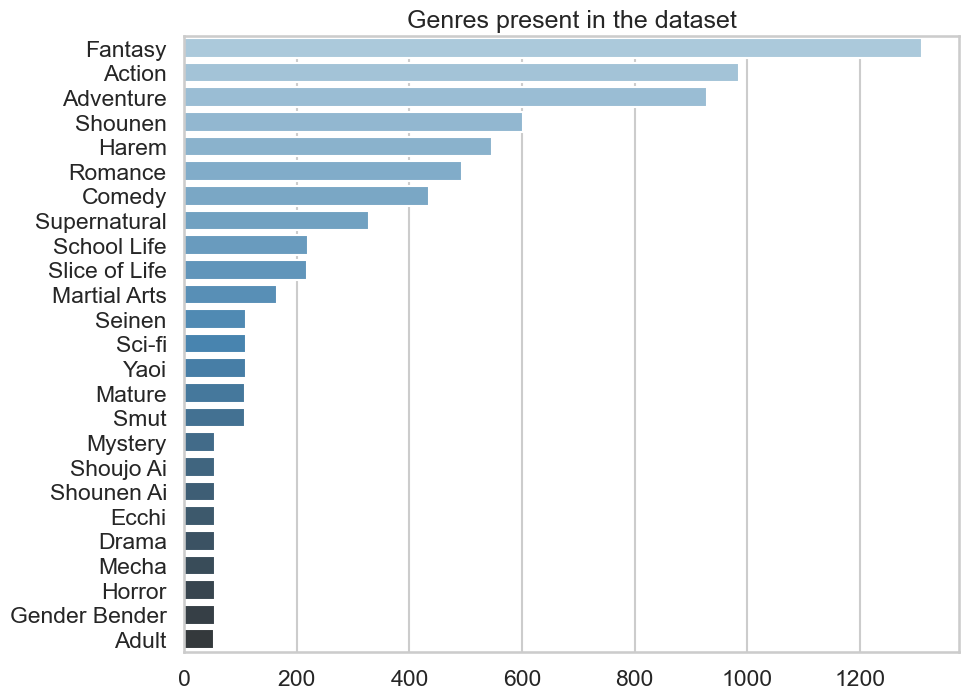

In [17]:
sns.set_style("whitegrid") # Sets the graph style
sns.set_context("talk") # Creates a uniform font size
plt.figure(figsize=(10,8)) # Figure size
sns.barplot(y=df_genres_trans.index, x=df_genres_trans.values, palette="Blues_d") # Graph code
plt.title("Genres present in the dataset") # Title
plt.show()

#### Cleaning the data

*Loading in the helper function*

In [18]:
stop_words = stopwords.words('english')

def clean_text(text):
    text = str(text).lower() # Lowercases everything 
    text = re.sub('<.*?>+', '', text) # Removes everything between '<' and '>'
    text = re.sub(r'[^\w\s]', '', text) # Removes all punctuation
    text = re.sub('\n', '', text) # Removes any breaklines
    text = re.sub('\w*\d\w*', '', text) # Removes any words that contain numbers 
    
    # Remove Stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Removing non english characters
    text = ''.join(line for line in text if line in string.printable)
    
    # Fixing extra whitespaces between words
    text = ' '.join(text.split())
    return text

Cleaning the data 

In [19]:
df_processed['descriptions_cleaned'] = df_processed['descriptions'].apply(clean_text) # Applies the function over every line in the dataset
df_processed[['descriptions','descriptions_cleaned']]

,descriptions,descriptions_cleaned
0,"Lain, a reincarnated person, lives his life as...",lain reincarnated person lives life antidemon ...
1,I who was reincarnated into a world of sword a...,reincarnated world sword magic revived demon k...
2,"Henry, born in a royal family without skills, ...",henry born royal family without skills given t...
3,"Starting over once more, he has entered this “...",starting entered living game order control fat...
4,A youth whose effort wasn’t rewarded lost his ...,youth whose effort wasnt rewarded lost life tr...
...,...,...
1361,"""Slayers follows the adventures of teenage sor...",slayers follows adventures teenage sorceress l...
1362,"The year is 2013, and it's the city of No. 6: ...",year city stringently controlled diligently ma...
1363,Originally published in Animage magazine in th...,originally published animage magazine late tit...
1364,"Suddenly finding himself in the Sengoku era, r...",suddenly finding sengoku era regular high scho...


#### Splitting the data into training and testing sets

*Shuffling the dataset*

In [20]:
df_processed = df_processed.sample(df_processed.shape[0], random_state=43)
df_processed = df_processed.reset_index(drop=True)
df_processed

,descriptions,Action,Adult,Adventure,Comedy,Drama,Ecchi,Fantasy,Gender Bender,Harem,...,Sci-fi,Seinen,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Smut,Supernatural,Yaoi,descriptions_cleaned
0,"Fantasy World One day, Chen Caixing entered in...",1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,fantasy world one day chen caixing entered wor...
1,I’d been reincarnated as the heroine of a pred...,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,id reincarnated heroine predictable thirdrate ...
2,"Fantasy World Right when Drako Yau, the chairm...",1,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,fantasy world right drako yau chairman game de...
3,A train journey to escape from reality.“Is it ...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,train journey escape realityis dreamwhen came ...
4,"After being hit by a car, she suddenly found h...",1,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,hit car suddenly found afterlife thought reaso...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,"Diablo Volfir, a mighty magician, was sealed f...",1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,diablo volfir mighty magician sealed aeons due...
1362,Beryl Gardernant is a humble sword master who ...,1,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,beryl gardernant humble sword master runs dojo...
1363,"Fantasy World [The Demon King is Dead], a stor...",1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,fantasy world demon king dead story demon king...
1364,Gu Wen Jing is a good actor by nature and has ...,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,gu wen jing good actor nature pair golden eyes...


**Splitting the data into 10% testing**

In [21]:
percent = 0.9 
num_training_examples = int(df_processed.shape[0]*percent)
df_train = df_processed.iloc[:num_training_examples]
df_test = df_processed.iloc[num_training_examples:]

*Looking at the number of training and testing examples*

In [22]:
df_train.shape

(1229, 27)

In [23]:
df_test.shape

(137, 27)

**Creating X_train, X_test, y_train, and y_test for cleaned and not cleaned data**

In [24]:
# Saving the whole dataset to a X and y variables for leave-one-out analysis later
X_raw = df_processed['descriptions']
X_clean = df_processed['descriptions_cleaned']
y = df_processed[[*genres_set]]

### Creating the training and testing sets

X_train_raw = df_train['descriptions']
X_train_clean = df_train['descriptions_cleaned']

X_test_raw = df_test['descriptions']
X_test_clean = df_test['descriptions_cleaned']

# We just use the labels and not the actual text
y_train = df_train[[*genres_set]]
y_test = df_test[[*genres_set]]

*Taking a look the testing and training sets looks like*

In [25]:
X_train_raw

0       Fantasy World One day, Chen Caixing entered in...
1       I’d been reincarnated as the heroine of a pred...
2       Fantasy World Right when Drako Yau, the chairm...
3       A train journey to escape from reality.“Is it ...
4       After being hit by a car, she suddenly found h...
                              ...                        
1224    Man-eating ghosts lurking in Victorian’s haunt...
1225    Fantasy World Partisan disputes in the empire ...
1226    He was a F-rank Hunter. To top it off, he was ...
1227    Fantasy World A miracle doctor is exiled to an...
1228    Dragged by the quarrel between brother of a co...
Name: descriptions, Length: 1229, dtype: string

In [26]:
X_train_clean

0       fantasy world one day chen caixing entered wor...
1       id reincarnated heroine predictable thirdrate ...
2       fantasy world right drako yau chairman game de...
3       train journey escape realityis dreamwhen came ...
4       hit car suddenly found afterlife thought reaso...
                              ...                        
1224    maneating ghosts lurking victorians haunted ho...
1225    fantasy world partisan disputes empire made ev...
1226    frank hunter top useless frank loser hyung dra...
1227    fantasy world miracle doctor exiled alternate ...
1228    dragged quarrel brother count certain remote r...
Name: descriptions_cleaned, Length: 1229, dtype: object

In [27]:
X_test_raw

1229    Monster Soul Online.A virtual reality MMORPG k...
1230    The end of all worlds approach.The Demon King ...
1231    After waking up one day, Bruce Lite found hims...
1232    Arisugawa Kyoko, a self-proclaimed ordinary hi...
1233    When Li Shen’s second personality acts out, he...
                              ...                        
1361    Diablo Volfir, a mighty magician, was sealed f...
1362    Beryl Gardernant is a humble sword master who ...
1363    Fantasy World [The Demon King is Dead], a stor...
1364    Gu Wen Jing is a good actor by nature and has ...
1365    In the Kingdom of Highland, a country where fa...
Name: descriptions, Length: 137, dtype: string

In [28]:
X_test_clean

1229    monster soul onlinea virtual reality mmorpg kn...
1230    end worlds approachthe demon king order harves...
1231    waking one day bruce lite found possessing bod...
1232    arisugawa kyoko selfproclaimed ordinary high s...
1233    li shens second personality acts consciousness...
                              ...                        
1361    diablo volfir mighty magician sealed aeons due...
1362    beryl gardernant humble sword master runs dojo...
1363    fantasy world demon king dead story demon king...
1364    gu wen jing good actor nature pair golden eyes...
1365    kingdom highland country fairies saves humans ...
Name: descriptions_cleaned, Length: 137, dtype: object

In [29]:
y_train

,Action,Adult,Adventure,Comedy,Drama,Ecchi,Fantasy,Gender Bender,Harem,Horror,...,School Life,Sci-fi,Seinen,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Smut,Supernatural,Yaoi
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1225,1,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1226,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1227,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [30]:
y_test

,Action,Adult,Adventure,Comedy,Drama,Ecchi,Fantasy,Gender Bender,Harem,Horror,...,School Life,Sci-fi,Seinen,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Smut,Supernatural,Yaoi
1229,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1230,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1231,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1232,1,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1233,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1362,1,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1363,1,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1364,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


#### Tokenizing the training and testing data

In [31]:
# For raw data using the tfidf
tfidf_raw = TfidfVectorizer()
tfidf_raw.fit_transform(X_train_raw)

# For clean data using the tfidf
tfidf_clean = TfidfVectorizer()
tfidf_clean.fit_transform(X_train_clean)

# For raw data using the count vectorizer
cv_raw = CountVectorizer()
cv_raw.fit_transform(X_train_raw)

# For raw data using the count vectorizer
cv_clean = CountVectorizer()
cv_clean.fit_transform(X_train_clean)

<1229x15978 sparse matrix of type '<class 'numpy.int64'>'
	with 64542 stored elements in Compressed Sparse Row format>

## Machine Learning for Multi-Label

In [32]:
from sklearn.multioutput import MultiOutputClassifier # Multi-output wrapper import
from sklearn.naive_bayes import MultinomialNB # Naive Bayes import
from sklearn.svm import LinearSVC # Support Vector Machine import
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # Metrics

Scikit-learn has two different wrapper that we can use to do Multi-Label classification:
 - MultiOutputClassifier
     - https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html
 - ClassifierChain
     - https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html

### Naive Bayes (Raw Data)
**Using MultiOutputClassifier**

In [33]:
model = MultiOutputClassifier( # Using the MultiOutputClassifier wrapper around the model we want to use
    MultinomialNB(), # The model itself
    n_jobs=1 # Number of CPU cores we want working on the model
)
# Training the model
model.fit(
    tfidf_raw.transform(X_train_raw), # Transforming the raw data into tfidf 
    y_train # Training labels
)

MultiOutputClassifier(estimator=MultinomialNB(), n_jobs=1)

In [34]:
# Making predictions on the testing data
y_pred = model.predict(
    tfidf_raw.transform(X_test_raw) # Tranforming the testing data to make a prediction on
)
# Looking at what the model predicted
y_pred

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

**Checking Metrics**

In [35]:
print(classification_report(y_test.values.astype(int), y_pred, target_names=genres_set))

               precision    recall  f1-score   support

       Action       0.69      1.00      0.81        94
        Adult       0.00      0.00      0.00         5
    Adventure       0.69      1.00      0.81        94
       Comedy       0.00      0.00      0.00        48
        Drama       0.00      0.00      0.00         9
        Ecchi       0.00      0.00      0.00         1
      Fantasy       0.96      1.00      0.98       132
Gender Bender       0.00      0.00      0.00         7
        Harem       0.00      0.00      0.00        54
       Horror       0.00      0.00      0.00         6
 Martial Arts       0.00      0.00      0.00        15
       Mature       0.00      0.00      0.00        14
        Mecha       0.00      0.00      0.00         4
      Mystery       0.00      0.00      0.00         4
      Romance       0.00      0.00      0.00        50
  School Life       0.00      0.00      0.00        20
       Sci-fi       0.00      0.00      0.00         8
       Se

This can be a lot to look at and confusing. 

What does **Precision**, **Recall**, and **F1-score** mean?

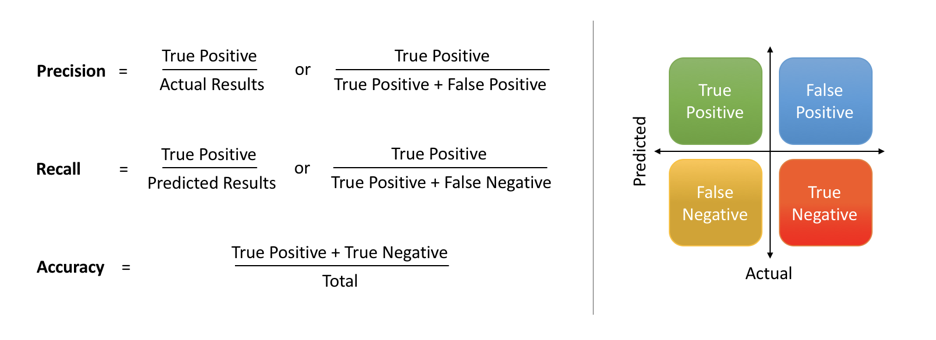

#### In simpler terms: <br>
**Precision** can be thought of as: Of the positive predictions, what fraction are correct? <br>
**Recall** can be throught of as: Of the positive labels, what is the fraction that were predicted positive? <br>

**F1-score** is just a harmonic mean between *precision* and *recall*

There is a lot going on here. Depending on you're trying to optimize you might want to focus more on higher precision, recall, f1, or accuracy. 

In [36]:
def smaller_classification_report(y_true, y_pred, floating_point = 2):
    """
    Function to help us print a nicer classification if we just want selected metrics
    """
    print("Accuracy \t\t{}".format(round(accuracy_score(y_true, y_pred), floating_point)))
    print("Precision (weighted) \t{}".format(round(precision_score(y_true, y_pred, average='weighted'), floating_point)))
    print("Recall (weighted) \t{}".format(round(recall_score(y_true, y_pred, average='weighted'), floating_point)))
    print("F1-score (weighted) \t{}".format(round(f1_score(y_true, y_pred, average='weighted'), floating_point)))

In [37]:
smaller_classification_report(y_test.values.astype(int), y_pred)

Accuracy 		0.03
Precision (weighted) 	0.44
Recall (weighted) 	0.45
F1-score (weighted) 	0.4


The **accuracy is very low** because accuracy is accounting for all 25 different genres present. If a plot has, for example, 7 genres associated with it and the model guesses 6 of them correctly, then that counts against the accuracy. This is why something like Precision, Recall, or F1-Score is better.  

### Naive Bayes (Cleaned Data)
**Using MultiOutputClassifier**

Now I show the difference when we clean up the data a little bit. <br>
*Try chaning tfidf_clean to cv_clean and see the difference*

In [38]:
# Create the model
model = MultiOutputClassifier(
    MultinomialNB(), 
    n_jobs=1
)
# Train the model
model.fit(
    # cv_clean.transform(X_train_clean), # Uncomment to try and comment out below
    tfidf_clean.transform(X_train_clean), 
    y_train
)
# Make predictions on the test data
y_pred = model.predict(
    #cv_clean.transform(X_test_clean), # Uncomment to try and comment out below
    tfidf_clean.transform(X_test_clean) 
)
# Check our metrics
smaller_classification_report(y_test.values.astype(int), y_pred)

Accuracy 		0.03
Precision (weighted) 	0.47
Recall (weighted) 	0.45
F1-score (weighted) 	0.4


Right now it's not much of a difference. The precision went up slightly and that's about it. 

### Using ClassifierChain with Naive Bayes

In [39]:
from sklearn.multioutput import ClassifierChain # Chain Classifier import

In [40]:
# Creating the chain model
chain = ClassifierChain(
    MultinomialNB(), 
    order='random', 
    random_state=0
)
# Training the model
model = chain.fit(
    # cv_clean.transform(X_train_clean), # Uncomment to try and comment out below
    tfidf_clean.transform(X_train_clean), 
    y_train
)
# Making predictions
y_pred = model.predict(
    # cv_clean.transform(X_test_clean), # Uncomment to try and comment out below
    tfidf_clean.transform(X_test_clean)
)
smaller_classification_report(y_test.values.astype(int), y_pred)

Accuracy 		0.03
Precision (weighted) 	0.44
Recall (weighted) 	0.47
F1-score (weighted) 	0.42


Using the ClassifierChain may work slightly better in some instances. This is something that you have to experiment with is deciding which one to use. 

## Support Vector Machines

From now on, I will be using the cleaned data throughout the rest of this tutorial. You can play around with the raw data at any time too to see the difference.

**Using MultiOutputClassifier** <br>
**Using tfidf**

In [41]:
# Create the model
model = MultiOutputClassifier(
    LinearSVC(random_state=43), 
    n_jobs=1
)
# Train the model
model.fit(
    # cv_clean.transform(X_train_clean), # Uncomment to try and comment out below
    tfidf_clean.transform(X_train_clean), 
    y_train
)
# Make predictions on the test data
y_pred = model.predict(
    #cv_clean.transform(X_test_clean), # Uncomment to try and comment out below
    tfidf_clean.transform(X_test_clean) 
)
# Check our metrics
smaller_classification_report(y_test.values.astype(int), y_pred)

Accuracy 		0.01
Precision (weighted) 	0.5
Recall (weighted) 	0.5
F1-score (weighted) 	0.48


**Using ClassifierChain** <br>
**Using tfidf**

In [42]:
# Creating the chain model
chain = ClassifierChain(
    LinearSVC(random_state=43), 
    order='random', 
    random_state=0
)
# Training the model
model = chain.fit(
    # cv_clean.transform(X_train_clean), # Uncomment to try and comment out below
    tfidf_clean.transform(X_train_clean), 
    y_train
)
# Making predictions
y_pred = model.predict(
    # cv_clean.transform(X_test_clean), # Uncomment to try and comment out below
    tfidf_clean.transform(X_test_clean)
)
smaller_classification_report(y_test.values.astype(int), y_pred)

Accuracy 		0.01
Precision (weighted) 	0.53
Recall (weighted) 	0.41
F1-score (weighted) 	0.41


### Turning the models into a function

Instead of just constantly copying over the code, we can make a function with all the models to allow us to switch between some models and pre-processing steps

In [43]:
def sklearn_model(model, X_train, y_train, X_test, y_test, pre_processing='tfidf', multi='chain'):
    """
    This function takes in a scikit-learn model, testing and training data 
    and makes a predition on the testing data from the trained model on the
    
    args:
        model:   scikit-learn model
        X_train: training data
        y_train: training labels
        X_test:  testing data
        y_test:  testing labels
        pre_processing: specifies the kind of text pre-processing steps.
            pre_processing='tfidf' (default)
                - process the testing and training data with 
                    Term Frequency Inverse Document Frequency
            pre_processing=(None|str)
                - process the testing and training data with 
                    Count Vectorization
        multi: specifies which multi-output technique to apply to the 
               scikit-learn model
            multi='chain' (default)
                - applies the ClassifierChain wrapper
            multi=(None|str)
                - applied the MultiOutputClassifier wrapper
    """
    print(model, pre_processing, multi, '\n')
    
    if multi=='chain':
        multi_model = ClassifierChain(model, order='random', random_state=0)
    else: # Count Vector
        multi_model = MultiOutputClassifier(model, n_jobs=1)
        
    if pre_processing=='tfidf':
        X_train = tfidf_clean.transform(X_train)
        X_test = tfidf_clean.transform(X_test)
    else: # Count Vector
        X_train = cv_clean.transform(X_train)
        X_test = cv_clean.transform(X_test)
    # Training the model
    model = multi_model.fit(
        X_train,
        y_train
    )
    # Making predictions
    y_pred = model.predict(
        X_test
    )
    smaller_classification_report(y_test, y_pred)

*Note: this function is kind of crude and you can make a better one. This is just to show that it's usually more efficient to turn your whole model into a function (or class) object*

**Using MultiOutputClassifier** <br>
**Using CountVector**

In [44]:
sklearn_model(LinearSVC(), X_train_clean, y_train, X_test_clean, y_test, pre_processing='cv', multi="multi")

LinearSVC() cv multi 

Accuracy 		0.0
Precision (weighted) 	0.48
Recall (weighted) 	0.49
F1-score (weighted) 	0.49


**Using ClassifierChain** <br>
**Using CountVector**

In [45]:
sklearn_model(LinearSVC(), X_train_clean, y_train, X_test_clean, y_test, pre_processing='cv')

LinearSVC() cv chain 

Accuracy 		0.03
Precision (weighted) 	0.51
Recall (weighted) 	0.48
F1-score (weighted) 	0.49


### Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression # Logistic regression import

In [47]:
sklearn_model(LogisticRegression(class_weight='balanced'), X_train_clean, y_train, X_test_clean, y_test, pre_processing='tfidf', multi='chain')

LogisticRegression(class_weight='balanced') tfidf chain 

Accuracy 		0.02
Precision (weighted) 	0.47
Recall (weighted) 	0.54
F1-score (weighted) 	0.49


In [48]:
sklearn_model(LogisticRegression(class_weight='balanced'), X_train_clean, y_train, X_test_clean, y_test, pre_processing='cv', multi='chain')

LogisticRegression(class_weight='balanced') cv chain 

Accuracy 		0.01
Precision (weighted) 	0.49
Recall (weighted) 	0.48
F1-score (weighted) 	0.48


In [49]:
sklearn_model(LogisticRegression(class_weight='balanced'), X_train_clean, y_train, X_test_clean, y_test, pre_processing='cv', multi='multi')

LogisticRegression(class_weight='balanced') cv multi 

Accuracy 		0.01
Precision (weighted) 	0.49
Recall (weighted) 	0.51
F1-score (weighted) 	0.5


In [50]:
sklearn_model(LogisticRegression(class_weight='balanced'), X_train_clean, y_train, X_test_clean, y_test, pre_processing='tfidf', multi='multi')

LogisticRegression(class_weight='balanced') tfidf multi 

Accuracy 		0.02
Precision (weighted) 	0.51
Recall (weighted) 	0.5
F1-score (weighted) 	0.49


### Results

| Model               | Best Accuracy | Best Precision | Best Recall | Best F1-Score |
|---------------------|---------------|----------------|-------------|---------------|
| Naive Bayes         | 0.03          | 0.47           | 0.47        | 0.42          |
| SVM                 | 0.03          | 0.53           | 0.5         | 0.49          |
| Logistic Regression | 0.02          | 0.51           | 0.54        | 0.5           |

The results above show the highest each of the models performed on all these metrics. As we can see, not that great overall. Deciding which one to use in your application will take some experimentation. 

## Using Ensemble Chains 
### Combining all three (or more) models together

What we can also do is combine all three models together to make three separate predictions and take the most chosen prediction (hard voting) or the highest overall combined probabilities (soft voting). This usually performs better than a single model (but not always). 

In [51]:
from sklearn.ensemble import VotingClassifier # Import used to do this operation

In [52]:
from sklearn.svm import SVC # Need to use a slightly different Support Vector Machine for this method

**Hard Voting** <br>
**MultiOutputClassifier**

In [53]:
## Defining your models
clf1 = LogisticRegression(random_state=1, class_weight='balanced')
clf2 = MultinomialNB()
clf3 = SVC(random_state=43, kernel='rbf', probability=True)

### Putting the models together in the VotingClassifier wrapper
eclf = VotingClassifier(estimators=[
    ('lr', clf1), # Passing in a label and the model in a tuple
    ('gnb', clf2), 
    ('svm', clf3)],
    voting='hard')

### Passing in the voting classifier model
model = MultiOutputClassifier(eclf, n_jobs=1)
model.fit(cv_clean.transform(X_train_clean), y_train)
y_pred = model.predict(cv_clean.transform(X_test_clean))
smaller_classification_report(y_test, y_pred)

Accuracy 		0.01
Precision (weighted) 	0.47
Recall (weighted) 	0.48
F1-score (weighted) 	0.45


**Soft Voting**<br>
**MultiOutputClassifier**

In [54]:
clf1 = LogisticRegression(random_state=1, class_weight='balanced')
clf2 = MultinomialNB()
clf3 = SVC(random_state=43, kernel='rbf', probability=True)

eclf = VotingClassifier(estimators=[
    ('lr', clf1), 
    ('gnb', clf2), 
    ('svm', clf3)],
    voting='soft')

model = MultiOutputClassifier(eclf, n_jobs=1)
model.fit(cv_clean.transform(X_train_clean), y_train)
y_pred = model.predict(cv_clean.transform(X_test_clean))
smaller_classification_report(y_test, y_pred)

Accuracy 		0.01
Precision (weighted) 	0.48
Recall (weighted) 	0.49
F1-score (weighted) 	0.45


**Hard Voting**<br>
**ClassifierChain**

In [55]:
clf1 = LogisticRegression(random_state=1, class_weight='balanced')
clf2 = MultinomialNB()
clf3 = SVC(random_state=43, kernel='rbf', probability=True)

eclf = VotingClassifier(estimators=[
    ('lr', clf1),  
    ('gnb', clf2), 
    ('svm', clf3)],
    voting='hard')

model = ClassifierChain(eclf,order='random', random_state=0)
model.fit(cv_clean.transform(X_train_clean), y_train)
y_pred = model.predict(cv_clean.transform(X_test_clean))
smaller_classification_report(y_test, y_pred)

Accuracy 		0.01
Precision (weighted) 	0.49
Recall (weighted) 	0.51
F1-score (weighted) 	0.46


**Soft Voting**<br>
**ClassifierChain**

In [56]:
clf1 = LogisticRegression(random_state=1, class_weight='balanced')
clf2 = MultinomialNB()
clf3 = SVC(random_state=43, kernel='rbf', probability=True)

eclf = VotingClassifier(estimators=[
    ('lr', clf1), 
    ('gnb', clf2), 
    ('svm', clf3)],
    voting='soft')

model = ClassifierChain(eclf,order='random', random_state=0)
model.fit(cv_clean.transform(X_train_clean), y_train)
y_pred = model.predict(cv_clean.transform(X_test_clean))
smaller_classification_report(y_test, y_pred)

Accuracy 		0.01
Precision (weighted) 	0.52
Recall (weighted) 	0.51
F1-score (weighted) 	0.47


#### Training with all the same model

**Soft Voting** <br>
**ClassifierChain** <br>
**All Logistic Regression** <br>
**tfidf** <br>

In [57]:
clf1 = LogisticRegression(class_weight='balanced') # Note i didn't specify a random_state
clf2 = LogisticRegression(class_weight='balanced')
clf3 = LogisticRegression(class_weight='balanced')
clf4 = LogisticRegression(class_weight='balanced')
clf5 = LogisticRegression(class_weight='balanced')
clf6 = LogisticRegression(class_weight='balanced')
clf7 = LogisticRegression(class_weight='balanced')

eclf = VotingClassifier(estimators=[
    ('lr1', clf1), 
    ('lr2', clf2),
    ('lr3', clf3),
    ('lr4', clf4),
    ('lr5', clf5),
    ('lr6', clf6),
    ('lr7', clf7)],
    voting='soft')

model = ClassifierChain(eclf, order='random', random_state=0)
model.fit(tfidf_clean.transform(X_train_clean), y_train)
y_pred = model.predict(tfidf_clean.transform(X_test_clean))
smaller_classification_report(y_test, y_pred)

Accuracy 		0.02
Precision (weighted) 	0.47
Recall (weighted) 	0.54
F1-score (weighted) 	0.49


**Soft Voting <br>
MultiOutputClassifier <br>
All Logistic Regression <br>
tfidf**

In [58]:
clf1 = LogisticRegression(class_weight='balanced')
clf2 = LogisticRegression(class_weight='balanced')
clf3 = LogisticRegression(class_weight='balanced')
clf4 = LogisticRegression(class_weight='balanced')
clf5 = LogisticRegression(class_weight='balanced')
clf6 = LogisticRegression(class_weight='balanced')
clf7 = LogisticRegression(class_weight='balanced')

eclf = VotingClassifier(estimators=[
    ('lr1', clf1), 
    ('lr2', clf2),
    ('lr3', clf3),
    ('lr4', clf4),
    ('lr5', clf5),
    ('lr6', clf6),
    ('lr7', clf7)],
    voting='soft')

model = MultiOutputClassifier(eclf)
model.fit(cv_clean.transform(X_train_clean), y_train)
y_pred = model.predict(cv_clean.transform(X_test_clean))
smaller_classification_report(y_test, y_pred)

Accuracy 		0.01
Precision (weighted) 	0.49
Recall (weighted) 	0.51
F1-score (weighted) 	0.5


### Take away results

Doing a single model may be fine, but you can stack multiple of the same model and have them all predict on the same label, it come sometimes lead to a higher overall performance. 

### Random Search to find best Logistic Regression Model Hyperparameters

Because the best performing model was logistic regression, we can try to find the best hyperparameters for logistic regression. <br>
*Note: if you're unsure what to search because you don't know what it means, just google what other people used for random search and grid search hyperparameters*

In [59]:
from sklearn.model_selection import RandomizedSearchCV # Import for random search
import time as time
from scipy.stats import loguniform # Generates a value that follows the log scale

In [60]:
# Defining the logistic regression model
model = MultiOutputClassifier(LogisticRegression())

# Defining a dictionary to store the parameters
lr_params = dict()
lr_params['estimator__solver'] = ['sag', 'saga', 'lbfgs']
lr_params['estimator__penalty'] = ['none', 'l1', 'l2', 'elasticnet']
lr_params['estimator__C'] = loguniform(1e-5, 100)
lr_params['estimator__class_weight'] = [None, 'balanced']


lr_rs = RandomizedSearchCV(model, # Mode
                          lr_params, # Search Parameters
                          cv=3, # Number of cross validations
                          n_jobs=1, # Number of CPU cores
                          n_iter=30, # How many different models to try
                          scoring='f1', # What to optimize on (scoring metric)
                          verbose=1) # To see what the model is doing 

### Start the gridsearch
start = time.time()
lr_rs.fit(tfidf_clean.transform(X_train_clean), y_train) # Training
end = time.time()
print("Runtime of the random search is {:.2f} seconds".format(end - start))

### Save the parameters
lr_best_parameters = lr_rs.best_params_

### Print the results
print('\n#### Best Parameters ####')
[print(key, value, sep=' = ') for key, value in lr_rs.best_params_.items()]

### Make predictions
y_pred = lr_rs.predict(tfidf_clean.transform(X_test_clean))
print('\n#### Best Metrics ####')
print('\n',smaller_classification_report(y_test, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Runtime of the random search is 101.56 seconds

#### Best Parameters ####
estimator__C = 0.2781184057506849
estimator__class_weight = None
estimator__penalty = none
estimator__solver = sag

#### Best Metrics ####
Accuracy 		0.02
Precision (weighted) 	0.5
Recall (weighted) 	0.5
F1-score (weighted) 	0.48

 None


## Looking at the models predictions

Using the best parameters from the previous model

In [61]:
lr_rs.best_estimator_.estimator.get_params()

{'C': 0.2781184057506849,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
# Creating the model and training it on the training data
model = MultiOutputClassifier(LogisticRegression(**lr_rs.best_estimator_.estimator.get_params()))
model.fit(cv_clean.transform(X_train_clean), y_train)

MultiOutputClassifier(estimator=LogisticRegression(C=0.2781184057506849,
                                                   penalty='none',
                                                   solver='sag'))

You can keep running the cell below and it will make random predictions

In [63]:
# Getting a random example
random_example = np.random.choice(df_test.shape[0])

print("##### Description #####", df_test['descriptions_cleaned'].iloc[random_example], "", sep="\n")

predictions = model.predict(cv_clean.transform([df_test['descriptions_cleaned'].iloc[random_example]]))
print('##### Genre\'s predicted #####')
for i in range(len(predictions[0])):
    if int(predictions[0][i]) == 1:
        print(genres_set[i])
        
print('##### Actual Genre\'s #####')
for genre in df_test[[*genres_set]].iloc[random_example][df_test[[*genres_set]].iloc[random_example] == 1].index:
    print(genre)

##### Description #####
various things happened got ability god reincarnated another world watched highspec family super ordinary fully enjoyed world life using ability received god daily life fluffing petting fantasy animals shady movements led nose god ill best various things cheatlike comrades

##### Genre's predicted #####
Action
Adventure
Fantasy
Harem
Shounen
##### Actual Genre's #####
Action
Adventure
Fantasy
Martial Arts
Shounen


## Conclusion

The main take-aways are that there doing multi-label classification problems just require a few extra steps compared to multi-label classification. 

There are two different wrapper methods that we use to do multi-label:
- **MultiOutputClassifier**
- **ClassifierChain**

When analyzing the metrics, it's sometimes not good to look at the accuracy because the accuracy can be a really low number if there are too many labels to predict. In this notebook, there were 25 labels that could be predicted. So wrongly predicting one of them counts against accuracy. Instead, you may want to look at the Precision, Recall or F1-score as a better indicator on how your model is doing. 

You can also stack models on top of each other by using the **VotingClassifier**. This allows you to train multiple independent models (or the same one) to make a prediction on the same value. This can sometimes lead to a better performance than just a single model. The two main options when using **VotingClassifier** wrapper are:
- Hard Voting
    - Predicting the class based on the most amount of votes
- Soft Voting
    - Predicting the class based on the highest overall combined probabilities

Finally, you can use something like a **RandomizedSearchCV** with the *MultiOutputClassifier* or *ClassifierChain* to further fine-tune your models to make sure they are performing the best. 

<hr>

### Reminders

Don't forget to process the text data by cleaning and encoding it. <br>
Don't forget to split your dataset into training and testing sets. <br>
Train your model with the training data and test on the testing data. 

<hr>

### Other datasets to try this kind of problem on

https://www.kaggle.com/shivanandmn/multilabel-classification-dataset?select=train.csv <br>
- Classify the paper abstract with 6 different labels<br>

https://www.kaggle.com/urbanbricks/wikipedia-promotional-articles?select=promotional.csv<br>
- Classify the promotional article's tones<br>